In [139]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [140]:
# 1. Background extraction
img = cv2.imread(r'cell_segmentation.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# applying dilation for sure_bg detection
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# defining kernel for opening operation
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 3)

# after opening, will perform dilation
sureBG = cv2.dilate(opening, kernel, iterations = 3)

# 2. Foreground extraction
distTransform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

ret, sureFG = cv2.threshold(distTransform, 0.7 * distTransform.max(), 255, 0)
sureFG = np.uint8(sureFG)

# 3. Finding the unknown area (neither sure foreground nor for backgroubd)
unknown = cv2.subtract(sureBG, sureFG)

# 4. Apply Watershed Algorithm
ret, markers = cv2.connectedComponents(sureFG)
#print(markers)

# add one so that sure bg is not 0
markers = markers + 1

# making the unknown area as 0
markers[unknown == 255] = 0

markers = cv2.watershed(img, markers)

# boundry region is marked with -1
img[markers == -1] = (255, 0, 0)

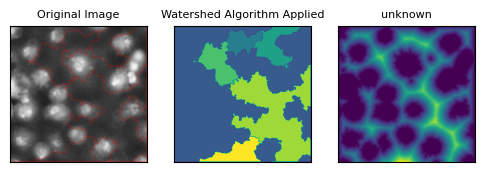

In [141]:
plt.figure(figsize=(6,6), num='test.img')

plt.subplot(1, 3, 1)
plt.xticks([]), plt.yticks([])
plt.title('Original Image', fontsize= 8)
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.xticks([]), plt.yticks([])
plt.title('Watershed Algorithm Applied', fontsize= 8)
plt.imshow(markers)

plt.subplot(1, 3, 3)
plt.xticks([]), plt.yticks([])
plt.title('unknown', fontsize= 8)
plt.imshow(distTransform)

Number of cells: 9


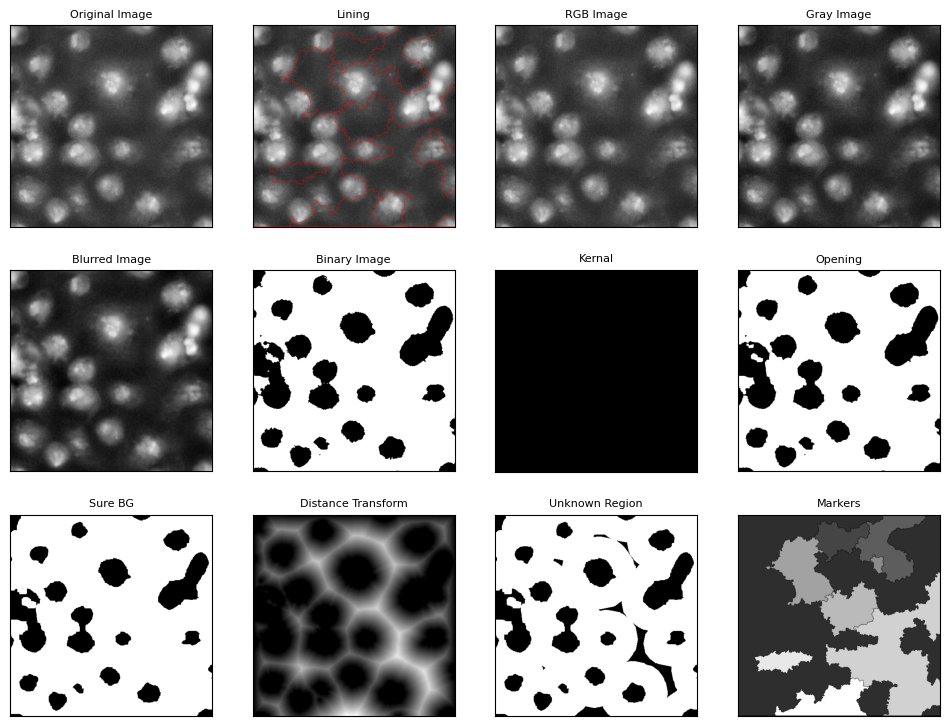

In [142]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread(r'cell_segmentation.jpg')
image = img.copy()
imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Otsu's thresholding
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove noise
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply the watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

# Count the number of cells
# The unique markers correspond to different cells
unique_markers = len(np.unique(markers)) - 2  # Subtract 2 for background and boundary

# Display the results
plt.figure(figsize=(12, 9))

titles = ['Original Image', 'Lining', 'RGB Image', 'Gray Image', 'Blurred Image', 'Binary Image', 'Kernal', 'Opening', 'Sure BG', 'Distance Transform', 'Unknown Region', 'Markers']
images = [img, image, imgRGB, gray, blurred, binary, kernel, opening, sure_bg, dist_transform, unknown, markers]

for i in range(len(titles)):
    plt.subplot(3, 4, i+1)
    plt.title(titles[i], fontsize = 8)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')

print(f'Number of cells: {unique_markers}')
